In [1]:
import os
import charts_function_list

In [141]:
#base, data, outputs = charts_function_list.folder_setup()

data = '/Users/alexanderpudlin/Documents/GitHub/charts_and_more_charts/data'
os.chdir(data)
bridges = pd.read_csv('bridges.csv').sort_values(by='Clearance/Height Above Ground')


bridges = pd.concat([bridges,extra_record])
bridges = bridges.sort_values(by='Clearance/Height Above Ground').reset_index(drop=True).loc[0:9,:]

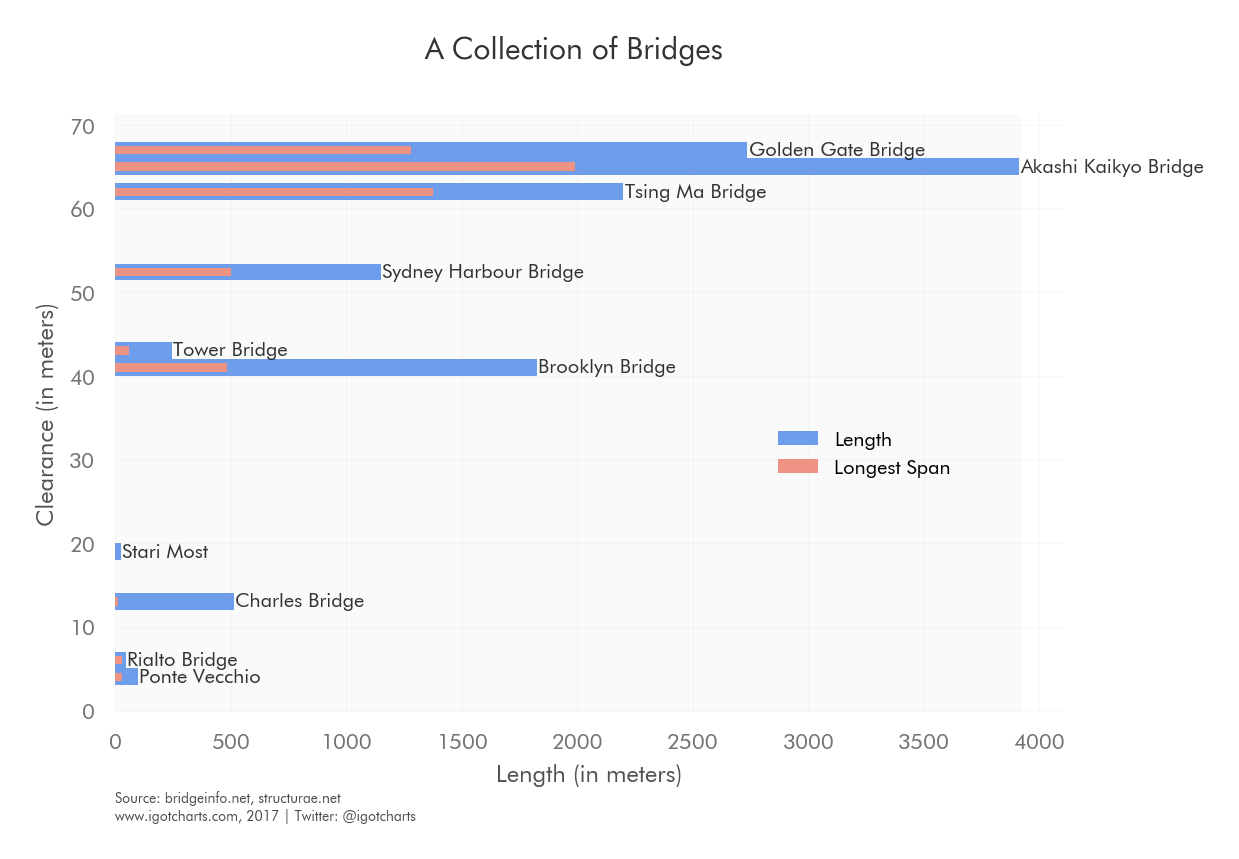

In [143]:
bridge_charts = charts_function_list.chart_maker('A Collection of Bridges',title_size=30)
fig = bridge_charts.initial_fig_axis(figsize=(17,11))
ax = bridge_charts.axes_set_up(fig=fig)
ax.barh(bottom = bridges['Clearance/Height Above Ground'],width=bridges['Length'],color='#6D9DEB',height=2,
        label='Length')
ax.barh(bottom = bridges['Clearance/Height Above Ground'],width=bridges['Longest Span'],color='#EE9284',
        height=1,label='Longest Span')

ax.set_xlabel('Length (in meters)',size=24,color='#525252')
ax.set_ylabel('Clearance (in meters)',size=24,color='#525252')

bridge_charts.tick_params_(ax,fontsize=22,pad=20,labelcolor='#737373')
ax.legend(fontsize=20,bbox_to_anchor=(.9,.5))

#add labels
for i,v in enumerate(bridges['Bridge']):
    ax.text(bridges['Length'][i]+5,bridges['Clearance/Height Above Ground'][i],v,va='center',fontsize=20,alpha=.8)

bridge_charts.patch_adder(ax,zorder=0,width=.955,alpha=.3)

bridge_charts.citations(ax,bridges.columns[-1],source_y=-.15,chart_tag_y=-.18,alpha=.7)   
plt.show()